In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/theot/Documents/SEGR_0D/EGR0D/'))
if module_path not in sys.path:
    sys.path.append(module_path)

#sys.path.remove('/Users/theot/Documents/SEGR_0D/EGR0D/')
print(sys.path)

from lib_egr_260 import *
import time
from egr_multiproc import *
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import as_completed

['/Users/theot/Documents/SEGR_0D/EGR0D/src', '/Users/theot/Documents/SEGR_0D/EGR0D/src', '/Users/theot/Documents/arcane/ARCANE', '/opt/homebrew/anaconda3/envs/can260/lib/python39.zip', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9/lib-dynload', '', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9/site-packages', '/Users/theot/Documents/SEGR_0D/EGR0D']


In [4]:
if __name__ == '__main__':
    # get the start time
    st = time.time()

    config = case('CH4:1.',                     #fuel compo
                  'O2:1. N2:3.76',              #ox compo
                  'CO2:1.',                     #egr compo
                  [0.7,0.8,0.9,1.0,1.1,1.2],                    #phi range
                  [0.0,0.1,0.3],                    #egr range
                  'mole',                       #egr rate unit
                  'Aramco13.cti'                   #scheme
                 )
    
    dfs=[]
    pressures = [100_000,500_000] #Pa
    for p in pressures:
        #set reservoirs thermo-state
        with ProcessPoolExecutor(max_workers=4)as executor:
            config.res.fuel = create_reservoir(config.compo.fuel,config.scheme, 300.0, p)
            config.res.ox = create_reservoir(config.compo.ox,'air.xml', 300.0, p)
            config.res.egr = create_reservoir(config.compo.egr,config.scheme, 300.0, p)

            reactor,pdresult = compute_solutions_1D(config,real_egr=False,species = ['CH4','H2','O2','CO','CO2','H2O'])
        
        dfs.append(pdresult)
    
    print(dfs)

    # get the end time
    et = time.time()
    # get the execution time
    elapsed_time = et - st

        
    #select the columns to plot (X,Xbis,Y)    
    dfsc=[df.pivot_table(index='phi',columns='EGR',values='T') for df in dfs]
    dfsc=pd.concat(dfsc, axis = 1, keys = pressures)
    dfsc.to_csv('df_'+'aramco_1D_data'+'.csv')
    print(dfsc)
    print('Execution time:', elapsed_time, 'seconds')

    

/Users/theot/Documents/SEGR_0D/EGR0D/src/lib_egr_260.py:69: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/lib_egr_260.py:69: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/lib_egr_260.py:166: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(config.scheme)
/Users/theot/Documents/SEGR_0D

Waiting for tasks to complete...


/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_mul

About 1 tasks remain
About 0 tasks remain
Done
Waiting for tasks to complete...


/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_multiproc.py:20: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/egr_mul

About 1 tasks remain
About 0 tasks remain
Done


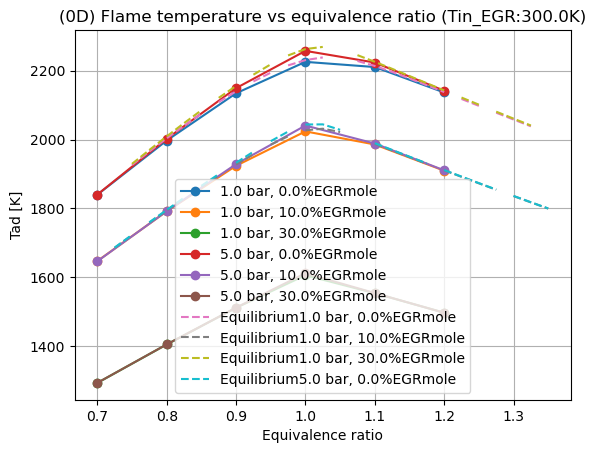

<AxesSubplot: title={'center': '(0D) Flame temperature vs equivalence ratio (Tin_EGR:300.0K)'}, xlabel='Equivalence ratio', ylabel='Tad [K]'>

In [3]:
title='(0D) Flame temperature vs equivalence ratio (Tin_EGR:'+str(config.res.egr.thermo.T)+'K)'
human_labels = [str(round(p/100000,1))+' bar, '+str(round(e*100,1))+"%EGR"+config.egr_unit for p in pressures for e in config.egr_range]
xlabel='Equivalence ratio'
ylabel='Tad [K]'

ax = show_graphs(dfsc,title,style='-o')

equilibrate_data=main(pressures)
equilibrate_data=[df.pivot_table(index='phi',columns='EGR',values='T') for df in equilibrate_data]
human_labels+=['Equilibrium'+str(round(p/100000,1))+' bar, '+str(round(e*100,1))+"%EGR"+config.egr_unit for p in pressures for e in config.egr_range]
equilibrate_data=pd.concat(equilibrate_data, axis = 1)
#equilibrate_data.plot(ax=ax, style='--',title='Temperature vs equivalence ratio',xlabel='Equivalence ratio',ylabel='T',legend=True)

show_graphs(equilibrate_data,title,human_labels,xlabel,ylabel,style='--',ax=ax,plot=True)

#plt.grid()
#plt.legend(loc='best')
#ax.legend(human_labels)
#plt.show()


